## Stats and Public Health Deliverable 2 - Jashkirat Virdi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load the dataset
data = pd.read_csv('mosquito_data_part_2.csv')

# Display basic information and the first few rows of the dataset
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Trap             18495 non-null  object 
 4   Trap type        18495 non-null  object 
 5   Date             18495 non-null  object 
 6   Mosquito number  18495 non-null  int64  
 7   WNV Present      18495 non-null  object 
 8   Species          18495 non-null  object 
 9   Lat              18495 non-null  float64
 10  Lon              18495 non-null  float64
 11  Month            18495 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 1.7+ MB
None


,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.977738,-87.880969,9
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.798211,-87.736925,9
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.987245,-87.689417,9
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.953664,-87.724987,9
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,negative,CULEX RESTUANS,41.657069,-87.546049,9


## Part 1 - Basic Analysis

In [2]:
# Convert 'WNV Present' to binary
data['WNV Present'] = data['WNV Present'].apply(lambda x: 1 if x == 'positive' else 0)

# Create dummy variables for 'Trap type'
data = pd.concat([data, pd.get_dummies(data['Trap type'], prefix='TrapType',dtype=int)], axis=1)

In [3]:
# Drop the original 'Trap type' column and other non-useful columns
data = data.drop(columns=['Trap type', 'Address Block', 'Trap', 'Date'])

In [4]:
data.head()

,Year,Week,Mosquito number,WNV Present,Species,Lat,Lon,Month,TrapType_CDC,TrapType_GRAVID,TrapType_OVI,TrapType_SENTINEL
0,2019,39,2,0,CULEX RESTUANS,41.977738,-87.880969,9,0,1,0,0
1,2019,39,1,0,CULEX RESTUANS,41.798211,-87.736925,9,0,1,0,0
2,2019,39,2,0,CULEX RESTUANS,41.987245,-87.689417,9,0,1,0,0
3,2019,39,1,0,CULEX RESTUANS,41.953664,-87.724987,9,0,1,0,0
4,2019,39,9,0,CULEX RESTUANS,41.657069,-87.546049,9,0,1,0,0


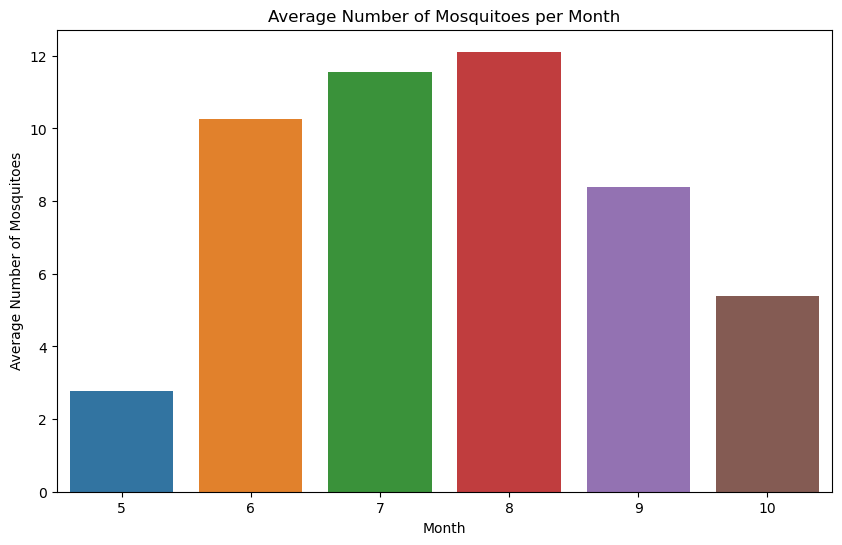

In [5]:
# Calculate and plot the average number of mosquitoes for each month
average_mosquitoes_per_month = data.groupby('Month')['Mosquito number'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Mosquito number', data=average_mosquitoes_per_month)
plt.title('Average Number of Mosquitoes per Month')
plt.xlabel('Month')
plt.ylabel('Average Number of Mosquitoes')
plt.show()


The average number of mosquitoes caught per month varies, with a peak in August (12.11 mosquitoes on average) and the lowest in May (2.76 mosquitoes on average). The trend suggests that mosquito activity is higher in the warmer months.

## Part 2 - Statistical Analysis

In [6]:
from scipy.stats import chi2_contingency

# Perform a chi-square test
contingency_table = pd.crosstab(data['Species'], data['WNV Present'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square test p-value: {p}")


Chi-square test p-value: 3.9302341764409087e-67


The chi-square test yields a p-value of approximately 3.93x10^-67, indicating a statistically significant difference in WNV presence across different mosquito species.

In [ ]:
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])

# Generate a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Negative Correlations: Longitude, TrapType_GRAVID, Month, Week, and TrapType_OVI are negatively correlated with mosquito numbers.
Positive Correlations: TrapType_CDC, Latitude, TrapType_SENTINEL, Year, and WNV Present are positively correlated with mosquito numbers. Notably, WNV Present has a relatively strong positive correlation (0.408) with mosquito numbers.

## Part 3 - Advanced Statistical Analysis

In [8]:
data = data.drop(columns=['TrapType_OVI','WNV Present'])

In [9]:
# Independet Variable 
X = data[['Year', 'Week', 'Month', 'TrapType_CDC', 'TrapType_GRAVID', 'TrapType_SENTINEL']]

# The dependent variable
y = data['Mosquito number']

In [11]:
data.head()

,Year,Week,Mosquito number,Species,Lat,Lon,Month,TrapType_CDC,TrapType_GRAVID,TrapType_SENTINEL
0,2019,39,2,CULEX RESTUANS,41.977738,-87.880969,9,0,1,0
1,2019,39,1,CULEX RESTUANS,41.798211,-87.736925,9,0,1,0
2,2019,39,2,CULEX RESTUANS,41.987245,-87.689417,9,0,1,0
3,2019,39,1,CULEX RESTUANS,41.953664,-87.724987,9,0,1,0
4,2019,39,9,CULEX RESTUANS,41.657069,-87.546049,9,0,1,0


In [12]:
# Add a constant to the model (the intercept)
X_withconstant = sm.add_constant(X) 

In [13]:
# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

# ignore red warning below

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     141.9
Date:                Tue, 05 Mar 2024   Prob (F-statistic):          1.37e-176
Time:                        22:05:17   Log-Likelihood:                -73929.
No. Observations:               18495   AIC:                         1.479e+05
Df Residuals:                   18488   BIC:                         1.479e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1091.4081     57.577    -18.956      0.000   -1204.264    -978.552
Year                  0.5458      0.028     19.573      0.000       0.491       0.600
Week                 -0.0676      0.073     -0.926      0.355      -0.211       0.076
Month                -0.2371      0.319     -0.744      0.457      -0.862       0.388
TrapType_CDC         18.0691     13.191      1.370      0.171      -7.786      43.924
TrapType_GRAVID       7.1275     13.180      0.541      0.589     -18.706      32.961
TrapType_SENTINEL    19.0232     13.214      1.440      0.150      -6.877      44.923
==============================================================================
Omnibus:                     4735.789   Durbin-Watson:                   1.523
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9574.472
Skew:                           1.563   Prob(JB):                         0.00
Kurtosis:                       4.627   Cond. No.                     1.20e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
# Independet Variable 
X = data[['Year','TrapType_CDC', 'TrapType_GRAVID', 'TrapType_SENTINEL']]

# The dependent variable
y = data['Mosquito number']

In [15]:
# Add a constant to the model (the intercept)
X_withconstant = sm.add_constant(X) 

In [16]:
# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

# ignore red warning below

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     205.4
Date:                Tue, 05 Mar 2024   Prob (F-statistic):          1.16e-172
Time:                        22:05:22   Log-Likelihood:                -73943.
No. Observations:               18495   AIC:                         1.479e+05
Df Residuals:                   18490   BIC:                         1.479e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1110.1780     56.139    -19.775      0.000   -1220.217   -1000.139
Year                  0.5537      0.027     20.363      0.000       0.500       0.607
TrapType_CDC         16.9963     13.199      1.288      0.198      -8.875      42.867
TrapType_GRAVID       6.1600     13.188      0.467      0.640     -19.690      32.010
TrapType_SENTINEL    17.8188     13.221      1.348      0.178      -8.096      43.734
==============================================================================
Omnibus:                     4762.301   Durbin-Watson:                   1.523
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9668.025
Skew:                           1.569   Prob(JB):                         0.00
Kurtosis:                       4.642   Cond. No.                     1.17e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
# Independet Variable 
X = data[['Year','TrapType_CDC', 'TrapType_GRAVID', 'TrapType_SENTINEL','Lat','Lon']]

# The dependent variable
y = data['Mosquito number']

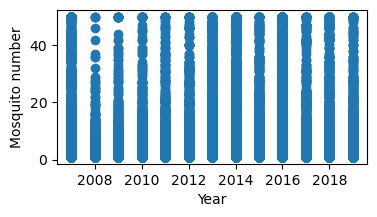

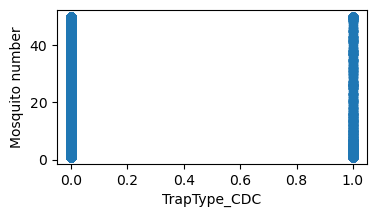

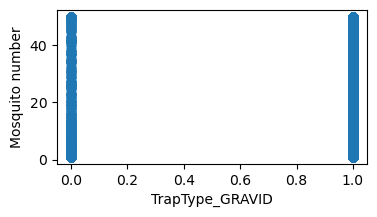

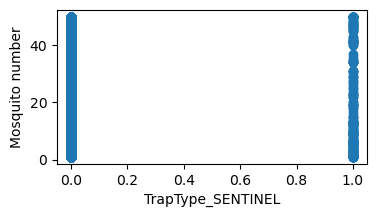

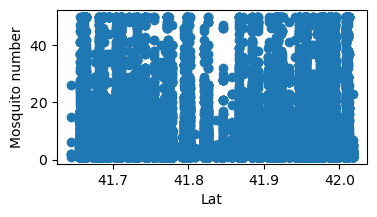

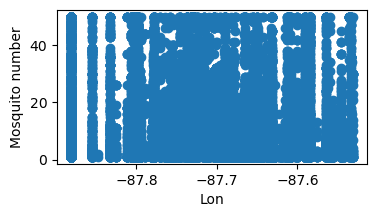

In [25]:
for col in X.columns: 
    plt.figure(figsize=(4,2))
    plt.scatter(X[col], y)
    plt.ylabel('Mosquito number')
    plt.xlabel(col)
    plt.show()

In [18]:
# Add a constant to the model (the intercept)
X_withconstant = sm.add_constant(X) 
# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

# ignore red warning below

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     218.8
Date:                Tue, 05 Mar 2024   Prob (F-statistic):          6.84e-271
Time:                        22:05:26   Log-Likelihood:                -73711.
No. Observations:               18495   AIC:                         1.474e+05
Df Residuals:                   18488   BIC:                         1.475e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -3094.3455    111.567    -27.735      0.000   -3313.028   -2875.663
Year                  0.5045      0.027     18.706      0.000       0.452       0.557
TrapType_CDC         18.9137     13.035      1.451      0.147      -6.636      44.464
TrapType_GRAVID       7.6832     13.024      0.590      0.555     -17.846      33.212
TrapType_SENTINEL    20.7924     13.058      1.592      0.111      -4.802      46.387
Lat                  -5.0978      1.255     -4.062      0.000      -7.558      -2.638
Lon                 -26.1651      1.521    -17.206      0.000     -29.146     -23.184
==============================================================================
Omnibus:                     4648.226   Durbin-Watson:                   1.533
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9344.546
Skew:                           1.533   Prob(JB):                         0.00
Kurtosis:                       4.650   Cond. No.                     2.35e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

I ran different models to see if I could improve the R-SQAURE and the above model is the best one I was able to develop and I explianed it below

The R-squared value of 0.066 means that roughly 6.6% of the changes in mosquito numbers can be understood using the variables in our model. This suggests that the model's ability to explain mosquito numbers is quite limited.

Year: A coefficient of 0.5045 means that for each additional year, the number of mosquitoes tends to increase by about 0.5045, assuming all other factors remain constant.

TrapType_CDC, TrapType_GRAVID, TrapType_SENTINEL: These coefficients represent how each trap type affects mosquito numbers compared to a baseline trap type (which isn't explicitly mentioned). However, since their p-values are greater than 0.05, these variables don't seem to have a significant impact on mosquito numbers.

Lat, Lon: The coefficients for latitude and longitude suggest a negative relationship with mosquito numbers. This means that as latitude and longitude increase, the number of mosquitoes tends to decrease.

Limited Explanation: The model can only account for a small fraction of the variation in mosquito numbers, indicating that there are likely other influential factors not considered.

Non-significant Variables: Some independent variables, like trap types ('TrapType_CDC', 'TrapType_GRAVID', 'TrapType_SENTINEL'), do not appear to significantly influence mosquito numbers according to statistical tests. This suggests that these variables may not be relevant predictors in the model.

Simplified Representation: The model may oversimplify the complex relationship between independent variables and mosquito numbers. Factors such as weather conditions, habitat suitability, and mosquito species diversity, which are known to affect mosquito populations, are not incorporated into the model.

In [20]:
residuals = myregression_results.resid
print(residuals)

0       -15.243240
1       -13.389508
2       -10.182789
3       -12.284680
4        -1.114731
           ...    
18490    -5.927741
18491    10.954101
18492    24.271187
18493    26.015190
18494    -9.225438
Length: 18495, dtype: float64


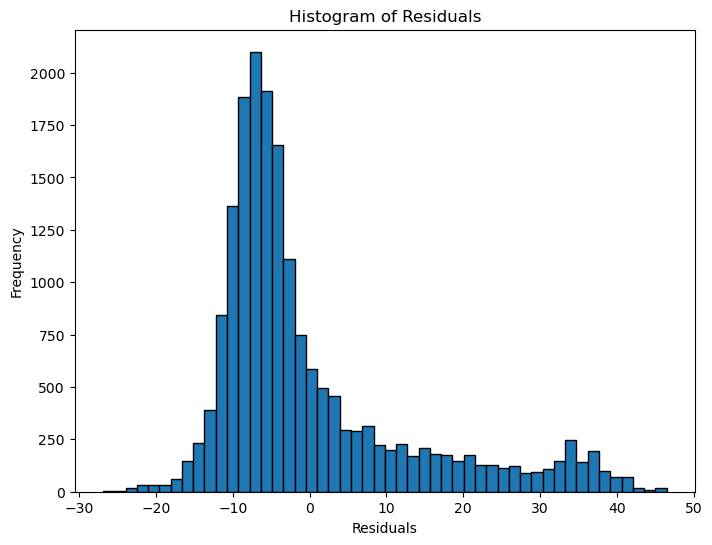

In [21]:
# Check for normality
# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=50, edgecolor='k')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


In [23]:
from scipy.stats import shapiro 
# Shapiro-Wilk test for normality
shapiro_test_statistic, shapiro_p_value = shapiro(residuals)
print(f"Shapiro-Wilk test p-value: {shapiro_p_value}")

Shapiro-Wilk test p-value: 0.0


/Users/jashkiratvirdi/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


This is like a bar chart showing how much the model's predictions miss the actual numbers.
We want to see a bell shape, but this chart isn't quite shaped like a bell, which means the predictions are consistently off in some way.
A test we use to check this (called the Shapiro-Wilk test) tells us that the chart really doesn't have the shape we want (since the p-value is 0.0).

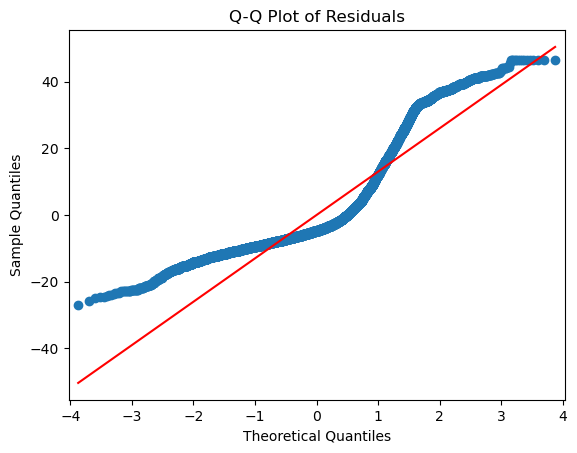

In [22]:
# Q-Q plot
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

This plot helps us see if the model's misses are the kind we'd expect by chance.
Ideally, all the points should be on the straight red line, but they're not, especially at the ends. This means that for really high or low predictions, the model is more likely to be wrong.

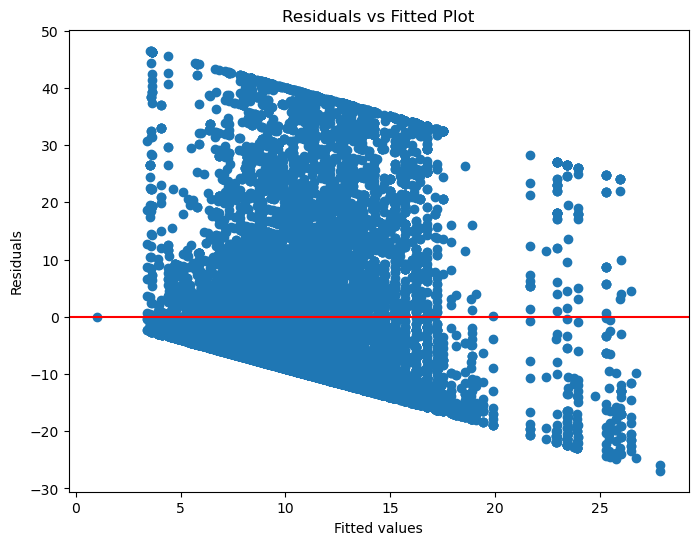

In [24]:
# Check for homoscedasticity
# Residuals vs Fitted plot
plt.figure(figsize=(8, 6))
plt.scatter(myregression_results.fittedvalues, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Plot')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

This plot shows each prediction the model makes against how much it was off.
If everything was perfect, the dots would be scattered evenly around the center line, but they're not. 
Instead, they show that the bigger the predictions, the bigger the misses tend to be, indicating that the model's accuracy is worse for higher values.

In [34]:
# Load the dataset
data = pd.read_csv('mosquito_data_part_2.csv')
data['WNV Present'] = data['WNV Present'].apply(lambda x: 1 if x == 'positive' else 0)

# Create dummy variables for 'Trap type'
data = pd.concat([data, pd.get_dummies(data['Trap type'], prefix='TrapType',dtype=int)], axis=1)

In [37]:
X = data[['Year', 'Week', 'Mosquito number', 'Lat', 'Lon', 'TrapType_GRAVID','TrapType_OVI', 'TrapType_SENTINEL']]

# The dependent variable is 'WNV Present'
y = data['WNV Present']

# Add a constant to the model (the intercept)
X_withconstant = sm.add_constant(X)

In [30]:
data.head()

,Year,Week,Mosquito number,Species,Lat,Lon,Month,TrapType_CDC,TrapType_GRAVID,TrapType_SENTINEL
0,2019,39,2,CULEX RESTUANS,41.977738,-87.880969,9,0,1,0
1,2019,39,1,CULEX RESTUANS,41.798211,-87.736925,9,0,1,0
2,2019,39,2,CULEX RESTUANS,41.987245,-87.689417,9,0,1,0
3,2019,39,1,CULEX RESTUANS,41.953664,-87.724987,9,0,1,0
4,2019,39,9,CULEX RESTUANS,41.657069,-87.546049,9,0,1,0


In [38]:
# Instantiate and fit the logistic regression model
logit_model = sm.Logit(y, X_withconstant)
logit_results = logit_model.fit()

# Display the summary of the logistic regression model
logit_model_summary = logit_results.summary()

logit_model_summary

         Current function value: 0.410883
         Iterations: 35


/Users/jashkiratvirdi/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                18495
Model:                          Logit   Df Residuals:                    18486
Method:                           MLE   Df Model:                            8
Date:                Tue, 05 Mar 2024   Pseudo R-squ.:                  0.2125
Time:                        23:22:24   Log-Likelihood:                -7599.3
converged:                      False   LL-Null:                       -9649.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -491.9685     24.311    -20.237      0.000    -539.617    -444.320
Year                  0.0961      0.006     15.624      0.000       0.084       0.108
Week                  0.1554      0.005     29.107      0.000       0.145       0.166
Mosquito number       0.0677      0.001     46.827      0.000       0.065       0.071
Lat                  -0.7300      0.285     -2.564      0.010      -1.288      -0.172
Lon                  -3.6685      0.333    -11.031      0.000      -4.320      -3.017
TrapType_GRAVID       0.0973      0.131      0.744      0.457      -0.159       0.354
TrapType_OVI        -13.6242   6886.258     -0.002      0.998   -1.35e+04    1.35e+04
TrapType_SENTINEL    -0.3036      0.215     -1.410      0.159      -0.726       0.118
=====================================================================================
"""

In [39]:
logit_results.params

const               -491.968460
Year                   0.096102
Week                   0.155431
Mosquito number        0.067738
Lat                   -0.730000
Lon                   -3.668502
TrapType_GRAVID        0.097274
TrapType_OVI         -13.624173
TrapType_SENTINEL     -0.303597
dtype: float64

The coefficients for 'Year', 'Week', and 'Mosquito number' are statistically significant with p-values less than 0.05. This indicates that these variables have a significant relationship with the presence of WNV, as seen by:

- 'Year': Each additional year is associated with a slight increase in the log odds of detecting WNV presence.
- 'Week': Each additional week is associated with a higher likelihood of detecting WNV presence, which could reflect a seasonal trend.
- 'Mosquito number': As expected, an increase in mosquito numbers is strongly associated with a higher likelihood of detecting WNV presence.

The geographic coordinates ('Lat' and 'Lon') are statistically significant, indicating that there might be specific geographic areas that are more prone to having WNV.

'Trap type' variables show different effects:
    
- 'Trap type_GRAVID' and 'Trap type_SENTINEL' are not statistically significant at the 0.05 level, indicating that after controlling for other factors, these trap types do not have a statistically significant association with the detection of WNV presence.
- 'Trap type_OVI' has an extremely large negative coefficient, which is likely not meaningful due to the large standard error and could indicate a problem with the data for this variable.

In [45]:
# Store the model's parameters in variables for interpretation
beta0 = logit_results.params['const']
beta1 = logit_results.params['Year']
beta2 = logit_results.params['Week']
beta3 = logit_results.params['Mosquito number']  # Mosquito number

In [53]:
# Calculating odds ratios
odds_ratio_const = np.exp(beta0)
odds_ratio_year = np.exp(beta1)
odds_ratio_week = np.exp(beta2)
odds_ratio_mosquito_number = np.exp(beta3)

In [61]:
# Display the odds ratios
odds_ratios = {
    'Odds ratio (const)': odds_ratio_const,
    'Odds ratio (Year)': odds_ratio_year,
    'Odds ratio (Week)': odds_ratio_week,
    'Odds ratio (Mosquito number)': odds_ratio_mosquito_number
}

In [62]:
odds_ratio_list = list(odds_ratios.values())
print(odds_ratio_list)

[2.1918582037158846e-214, 1.100871802057808, 1.16816151330849, 1.0700849240104182]


**Odds Ratio (Constant)**:
  - The odds ratio for the constant term is extremely small, close to zero.
  - It's not meaningful on its own as the context of the model doesn't allow for a 'year' or 'week' of zero.

**Odds Ratio (Year)**:
  - Each year increase is associated with a 10% increase in the odds of WNV presence.
  - This could mean WNV is becoming more common or detection is improving.

**Odds Ratio (Week)**:
  - Each additional week in the year is associated with a 17% increase in the odds of WNV presence.
  - Suggests a seasonal trend, possibly related to mosquito activity and weather.

**Odds Ratio (Mosquito Number)**:
  - Each additional mosquito captured increases the odds of WNV presence by 7%.
  - Indicates that higher mosquito counts are linked to a greater risk of WNV.